In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import os
import sys
import math
from PIL import Image
from pathlib import Path

def open_image(image_file):
    return np.array(Image.open(image_file))

In [30]:
def gen_dataset(img_dirs):

    img_sets = []

    for folder in os.listdir(img_dirs[0]):
        folder += "/"
        
        images = os.listdir(img_dirs[0]+folder)
        idx = len(img_dirs)-1
        
        for i in range(idx,len(images)):
            img_set = []
            for k, folder_i in enumerate(img_dirs):
                final_file = folder_i+folder+images[i-k]
                img_set.append(open_image(final_file))
            img_sets.append(np.array(img_set))
    return np.array(img_sets)
        
        
def downscale(datapack, scale=4):
    if scale <= 1:
        return datapack
    newshape = np.append(datapack.shape, (scale, datapack.shape[-1]))
    newshape[-3] = datapack.shape[-2] // scale
    newshape[-4] = scale
    newshape[-5] = datapack.shape[-3] // scale
    
    datapack = np.reshape(datapack, newshape)
    datapack = np.mean(datapack, axis=(-4, -2), dtype=np.float64)
    return datapack.astype(np.uint8)

def downscale_nn(datapack, xs, ys, scale=4):
    return datapack[:,ys::scale,xs::scale,:]

In [5]:
img_dirs = ["data/clean_p0/","data/clean_p1/","data/clean_p2/","data/clean_p3/","data/clean_p4/","data/clean_p5/","data/clean_p6/","data/clean_p7/"]

dataset = gen_dataset(img_dirs)

In [6]:
dataset_t = np.transpose(dataset, (0, 2, 3, 1))

In [7]:
dataset_t[...,0:1].shape

(880, 436, 1024, 1)

In [31]:
dataset_lr0 = downscale(dataset_t[...,0:1])
dataset_lr1 = downscale_nn(dataset_t[...,1:2], 2, 0)
dataset_lr2 = downscale_nn(dataset_t[...,2:3], 1, 1)
dataset_lr3 = downscale_nn(dataset_t[...,3:4], 3, 1)
dataset_lr4 = downscale_nn(dataset_t[...,4:5], 0, 2)
dataset_lr5 = downscale_nn(dataset_t[...,5:6], 2, 2)
dataset_lr6 = downscale_nn(dataset_t[...,6:7], 1, 3)
dataset_lr7 = downscale_nn(dataset_t[...,7:8], 3, 3)

In [44]:
dataset_lr0.shape

(880, 109, 256, 1)

In [46]:
Image.fromarray(dataset_t[0,:,:,0]).save("test_0.png")
Image.fromarray(dataset_lr0[0,:,:,0]).save("test_1.png")
Image.fromarray(dataset_lr1[0,:,:,0]).save("test_2.png")
Image.fromarray(dataset_lr2[0,:,:,0]).save("test_3.png")
Image.fromarray(dataset_lr3[0,:,:,0]).save("test_4.png")
Image.fromarray(dataset_lr4[0,:,:,0]).save("test_5.png")
Image.fromarray(dataset_lr5[0,:,:,0]).save("test_6.png")
Image.fromarray(dataset_lr6[0,:,:,0]).save("test_7.png")
Image.fromarray(dataset_lr7[0,:,:,0]).save("test_8.png")

In [34]:
dataset_lr = np.concatenate([dataset_lr0, dataset_lr1, dataset_lr2, dataset_lr3, dataset_lr4, dataset_lr5, dataset_lr6, dataset_lr7], axis=-1)

(880, 109, 256, 8)


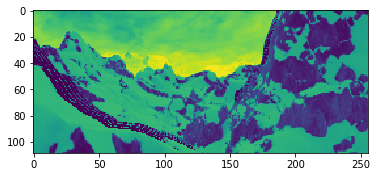

In [38]:
print(dataset_lr.shape)
plt.imshow(dataset_lr[600,:,:,5])

In [39]:
np.savez_compressed("dataset.npz", lr=dataset_lr, hr=dataset_t[...,0:1])